In [1]:
import os
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
filename = "../data/ldem_87s_5mpp.tif"
img = cv2.imread(filename,2)
print("Img is of Size: {}".format(img.shape))

Img is of Size: (40000, 40000)


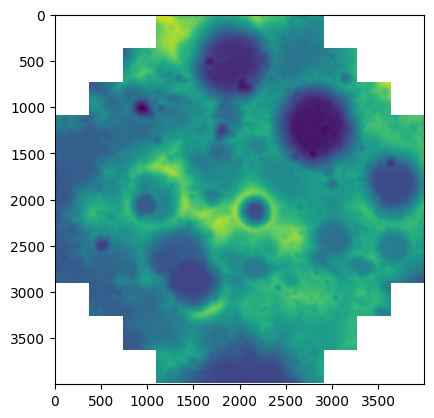

In [50]:
img_smaller = cv2.resize(img,(4000,4000))
plt.imshow(img_smaller)

In [9]:
print(img_smaller[1000,1000])

-3283.5618


In [12]:
# Angle Stuff
R = 100
#R = 1737400
x = 10
y = 10
phi1 = -np.pi/2
rho = np.sqrt(x**2+y**2)
c = 2*np.arctan2(rho,2*R)
decl = np.arcsin(np.cos(c)*np.sin(phi1)+((y*np.sin(c)*np.cos(phi1))/rho))
print(decl)

-1.4296099682268022


In [51]:
R = 1736000*2
phi = np.deg2rad(-87.07)
lambdda = np.linspace(0,2*np.pi,1000)
lambda0 = 0
phi1 = -np.pi/2
k = (2*R)/(1+np.sin(phi1)*np.sin(phi)+np.cos(phi1)*np.cos(phi)*np.cos(lambdda-lambda0))
xs = np.round(k*np.cos(phi)*np.sin(lambdda-lambda0)/100,0).astype(int)
ys = np.round(k*(np.cos(phi1)*np.sin(phi)-np.sin(phi1)*np.cos(phi)*np.cos(lambdda-lambda0))/100,0).astype(int)
points = np.array([xs,ys]).T + 2000
print(points[:20])

[[2000 3776]
 [2011 3776]
 [2022 3776]
 [2034 3776]
 [2045 3775]
 [2056 3775]
 [2067 3775]
 [2078 3774]
 [2089 3774]
 [2100 3773]
 [2112 3772]
 [2123 3772]
 [2134 3771]
 [2145 3770]
 [2156 3769]
 [2167 3768]
 [2178 3767]
 [2190 3766]
 [2201 3765]
 [2212 3763]]


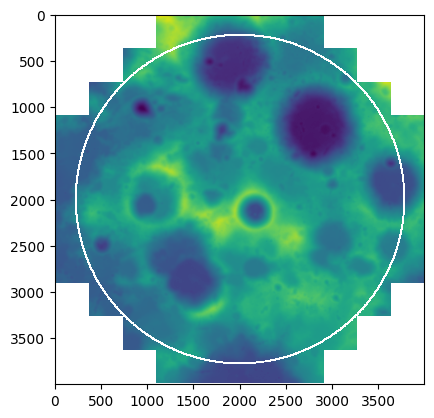

In [52]:
img_smaller_87 = img_smaller[:]
for point in points:
  img_smaller_87[point[0],point[1]] = np.nan
plt.imshow(img_smaller_87)